
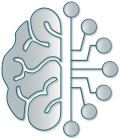

**Start at:** Sunday 27 July 2025, 15:02:49  
**Hostname:** device-9.home (Linux)

<p style="text-align: center"><img width="800px" src="./config/svg/pyPhysChemBanner.svg" style="margin-left:auto; margin-right:auto"/></p>

In [1]:
import os
import sys

cwd0 = './config/'
sys.path.append(cwd0)

import visualID_Eng as vID
from visualID_Eng import color, fg, bg, hl
vID.init(cwd0)
import tools4pyPhysChem as t4pPC

__authors__ = [Romuald Poteau <romuald.poteau@utoulouse.fr>, Stella Christodoulou <stella.christodoulou@utoulouse.fr>]
__version__ = "20250727"

# Top 10 Machine Learning Algorithms For Beginners: Supervised, and More

## Introduction

## Why is the random seed initialized to 42 in most datascience and ML applications?

<div class="rqE">

42 is iconic. It comes from Douglas Adams’s popular 1979 science-fiction novel *The Hitchhiker’s Guide to the Galaxy*. Toward the end of the book, the supercomputer Deep Thought reveals that the answer to the “Great Question” of “Life, the Universe and Everything” is “**forty-two**”. It took 7.5 million years to Deep Thought to calculate the answer to the ultimate question...

The author’s choice of the number 42 has become a reference in nerd culture. And it has its own [wikipedia entry](https://en.wikipedia.org/wiki/42_(number))

<figure>
<img width = "500px" src="./MiscImages/ML/42c.png" alt="Forty-two" />
<figcaption><b>Deep Thought</b>, the machine built to answer the ultimate question, stands in the cosmic void. Before it, the long-awaited answer Answer to the Ultimate Question of Life, the Universe, and Everything: <b>42</b></figcaption>
</figure> 
</div>
</div>

## Linear regression. Application to the correlation between diabetes and several criteria

### Introduction

<div class="intro">

Linear Regression predicts a continuous output by establishing a linear relationship between input variables and the output
</div>

### The database

<div class="intro">

Ten baseline variables, age, sex, body mass index (bmi), average blood pressure (bp), and six blood serum measurements (s1 to s6) were obtained for each of n = 442 diabetes patients, as well as the response of interest, hereafter named "the target", a quantitative measure of disease progression one year after baseline, see [https://scikit-learn.org/](https://scikit-learn.org/stable/datasets/toy_dataset.html#diabetes-dataset)

Each of these 10 feature variables have been mean centered and scaled by the standard deviation times the square root of n_samples (i.e. the sum of squares of each column totals 1)
</div>

#### Distribution of the measure of disease progression one year after baseline

<div class="intro">
Let's first load and inspect the distribution of the target variable.
This gives us an idea of whether it's skewed, normally distributed, or contains outliers.
</div>

,age,sex,bmi,bp,s1,s2,s3,s4,s5,s6,target
0,0.038076,0.050680,0.061696,0.021872,-0.044223,-0.034821,-0.043401,-0.002592,0.019907,-0.017646,151.0
1,-0.001882,-0.044642,-0.051474,-0.026328,-0.008449,-0.019163,0.074412,-0.039493,-0.068332,-0.092204,75.0
2,0.085299,0.050680,0.044451,-0.005670,-0.045599,-0.034194,-0.032356,-0.002592,0.002861,-0.025930,141.0
3,-0.089063,-0.044642,-0.011595,-0.036656,0.012191,0.024991,-0.036038,0.034309,0.022688,-0.009362,206.0
4,0.005383,-0.044642,-0.036385,0.021872,0.003935,0.015596,0.008142,-0.002592,-0.031988,-0.046641,135.0
...,...,...,...,...,...,...,...,...,...,...,...
437,0.041708,0.050680,0.019662,0.059744,-0.005697,-0.002566,-0.028674,-0.002592,0.031193,0.007207,178.0
438,-0.005515,0.050680,-0.015906,-0.067642,0.049341,0.079165,-0.028674,0.034309,-0.018114,0.044485,104.0
439,0.041708,0.050680,-0.015906,0.017293,-0.037344,-0.013840,-0.024993,-0.011080,-0.046883,0.015491,132.0
440,-0.045472,-0.044642,0.039062,0.001215,0.016318,0.015283,-0.028674,0.026560,0.044529,-0.025930,220.0


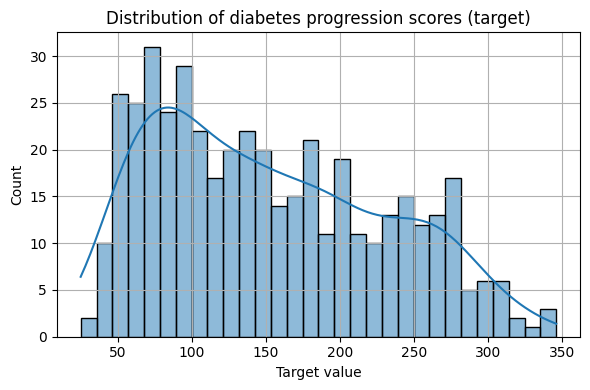

In [11]:
from sklearn.datasets import load_diabetes
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load the Diabetes dataset
diabetes = load_diabetes()
# Convert the dataset to a DataFrame
diabetes_df = pd.DataFrame(data=diabetes.data,
                           columns=diabetes.feature_names)

# Add target variable to the DataFrame
diabetes_df['target'] = diabetes.target
display(diabetes_df)

plt.figure(figsize=(6, 4))
sns.histplot(diabetes_df['target'], bins=30, kde=True)
plt.title("Distribution of diabetes progression scores (target)")
plt.xlabel("Target value")
plt.grid(True)
plt.tight_layout()
plt.show()

#### Linear correlation between each feature and the target

<div class="intro">

This helps identify which features are more likely to have predictive power under a linear model.
We will use the `df.corr()` method in pandas, that computes the Pearson correlation coefficient matrix between all numeric columns in a DataFrame.

The Pearson correlation coefficient (denoted *r*) measures the strength and direction of a linear relationship between two continuous variables. It ranges from:
- +1 → perfect positive linear relationship
- 0 → no linear relationship
- -1 → perfect negative linear relationship

For two variables *X* and *Y*, it is calculated as:

$$r = \frac{\mathrm{cov}(X, Y)}{\sigma_X \, \sigma_Y}$$

where:
- $\mathrm{cov}(X, Y)$ is the covariance between *X* and *Y*
- $\sigma_X$ and $\sigma_Y$ are their respective standard deviations
</div>
<br>
<div class="rq">

Pearson correlation only captures linear relationships. Two variables can be strongly related in a nonlinear way but still have a correlation close to zero. 

It is sensitive to outliers, which can distort the value of *r*
</div>

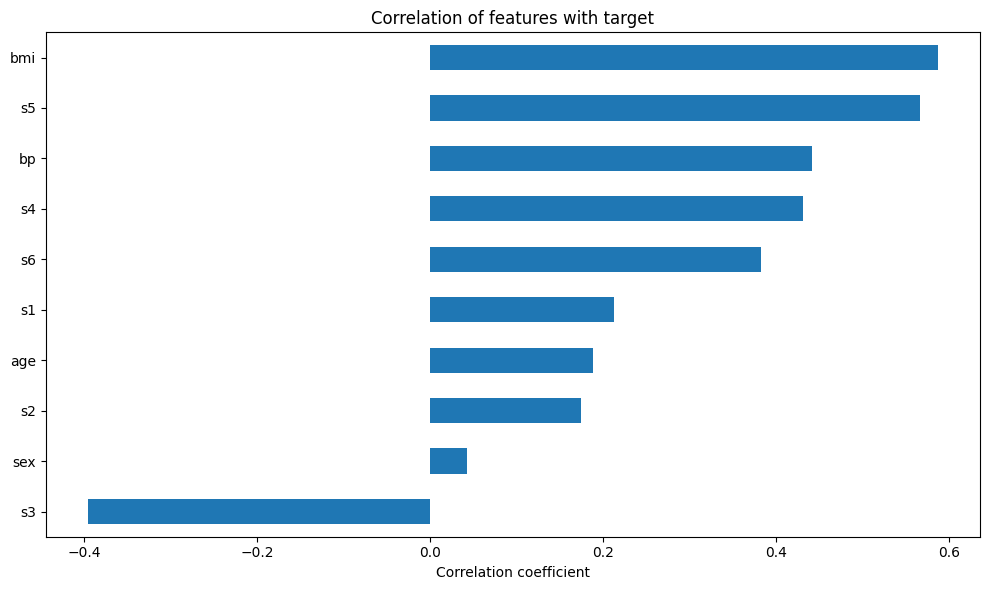

In [12]:
plt.figure(figsize=(10, 6))
correlations = diabetes_df.corr(numeric_only=True)['target'].drop('target').sort_values()
correlations.plot(kind='barh')
plt.title("Correlation of features with target")
plt.xlabel("Correlation coefficient")
plt.tight_layout()
plt.show()

#### Scatter Plots: Target vs Features

<div class="intro">

Now let's visualize how each feature relates to the target variable using scatter plots: this reveals possible non-linear relationships, or outliers.

</div>

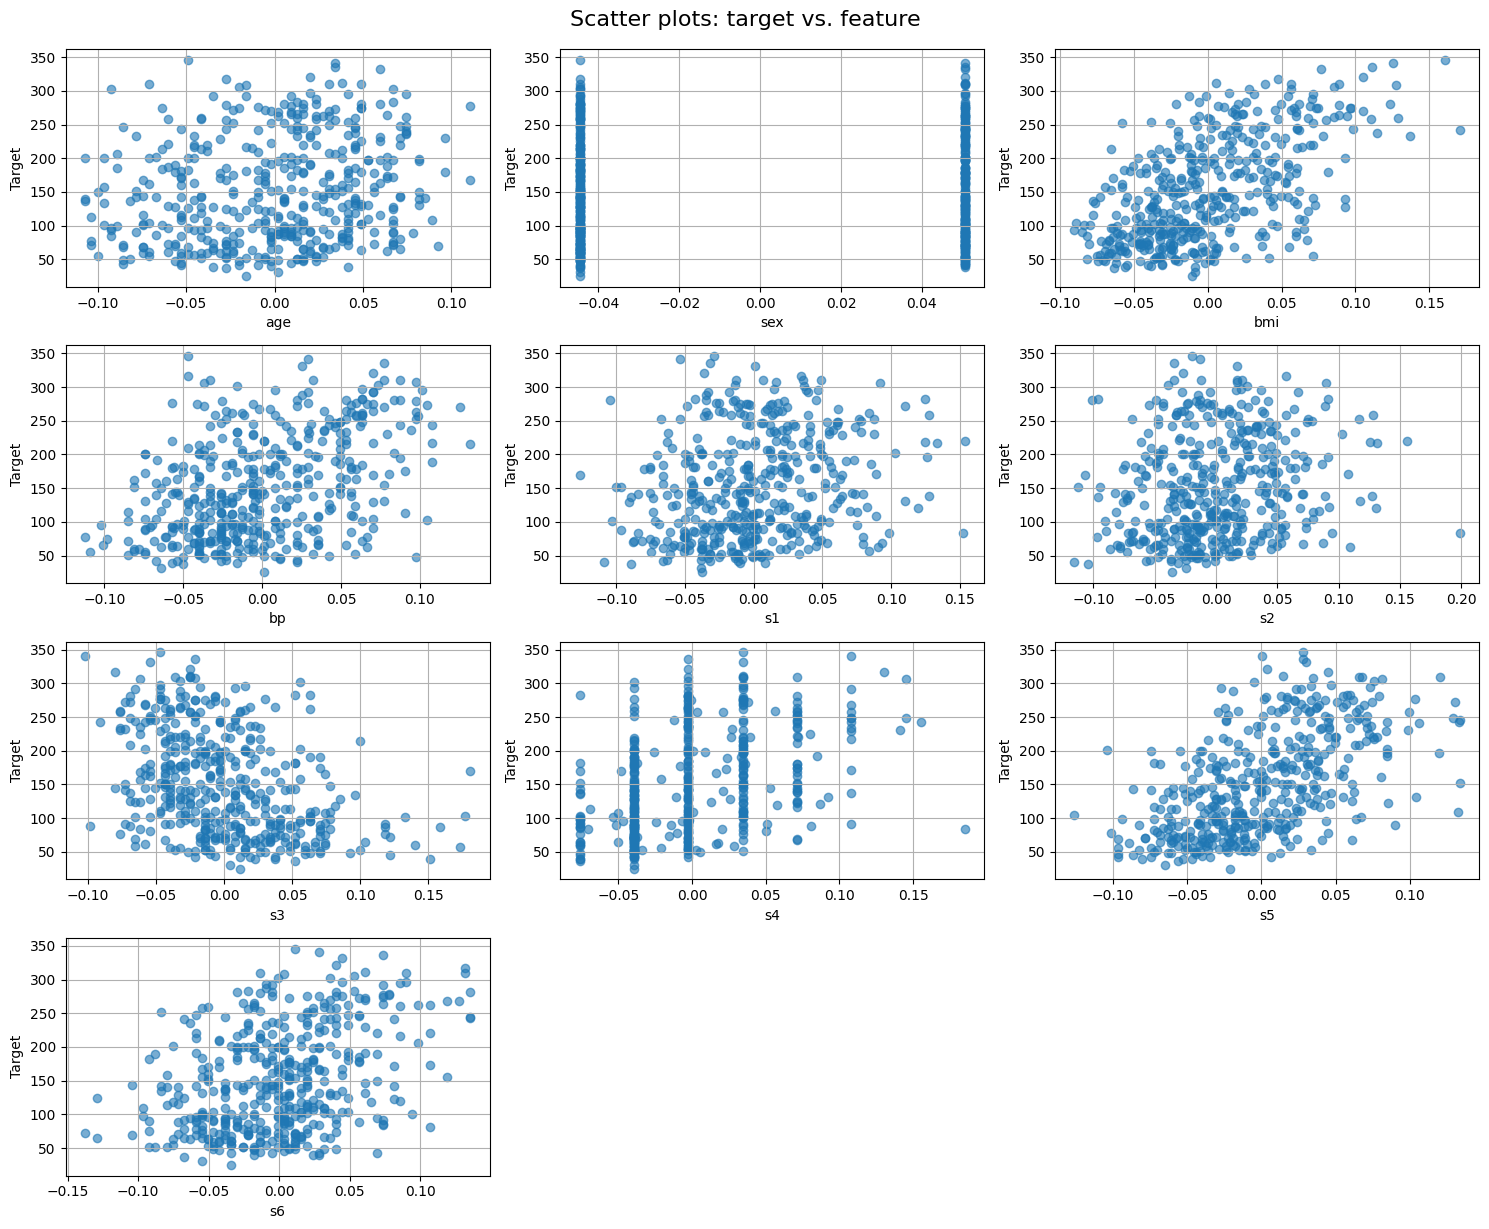

In [13]:
import math

n_cols = 3
n_features = len(diabetes.feature_names)
n_rows = math.ceil(n_features / n_cols)

fig, axes = plt.subplots(n_rows, n_cols, figsize=(15, 12))
axes = axes.flatten()

for i, feature in enumerate(diabetes.feature_names):
    axes[i].scatter(diabetes_df[feature], diabetes_df['target'], alpha=0.6)
    axes[i].set_ylabel("Target")
    axes[i].set_xlabel(feature)
    axes[i].grid(True)

# Remove unused subplots
for j in range(i + 1, len(axes)):
    fig.delaxes(axes[j])

plt.tight_layout()
plt.suptitle("Scatter plots: target vs. feature", fontsize=16, y=1.02)
plt.show()


### Training a linear model

In [7]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

X, y = diabetes.data, diabetes.target

# Splitting the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Creating and training the Linear Regression model
model = LinearRegression()
model.fit(X_train, y_train)

# Predicting the test set results
y_pred = model.predict(X_test)

# Evaluating the model
mse = mean_squared_error(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"MAE = {mae:.1f}")
print(f"MSE = {mse:.1f}")
print(f"R2 = {r2:.2f}")

,age,sex,bmi,bp,s1,s2,s3,s4,s5,s6,target
0,0.038076,0.050680,0.061696,0.021872,-0.044223,-0.034821,-0.043401,-0.002592,0.019907,-0.017646,151.0
1,-0.001882,-0.044642,-0.051474,-0.026328,-0.008449,-0.019163,0.074412,-0.039493,-0.068332,-0.092204,75.0
2,0.085299,0.050680,0.044451,-0.005670,-0.045599,-0.034194,-0.032356,-0.002592,0.002861,-0.025930,141.0
3,-0.089063,-0.044642,-0.011595,-0.036656,0.012191,0.024991,-0.036038,0.034309,0.022688,-0.009362,206.0
4,0.005383,-0.044642,-0.036385,0.021872,0.003935,0.015596,0.008142,-0.002592,-0.031988,-0.046641,135.0
...,...,...,...,...,...,...,...,...,...,...,...
437,0.041708,0.050680,0.019662,0.059744,-0.005697,-0.002566,-0.028674,-0.002592,0.031193,0.007207,178.0
438,-0.005515,0.050680,-0.015906,-0.067642,0.049341,0.079165,-0.028674,0.034309,-0.018114,0.044485,104.0
439,0.041708,0.050680,-0.015906,0.017293,-0.037344,-0.013840,-0.024993,-0.011080,-0.046883,0.015491,132.0
440,-0.045472,-0.044642,0.039062,0.001215,0.016318,0.015283,-0.028674,0.026560,0.044529,-0.025930,220.0


MAE = 42.8
MSE = 2900.2
R2 = 0.45


<div class="rq">

These results indicate that such Linear Regression model explains about 45% of the variance in the diabetes dataset. The MAE tells us that predictions are about 43 units away from the true values... which is obviously bad. **Such linear model is not adapted at all**.
</div>

### Graphical output

#### Performance of the model: Predicted *vs* True values

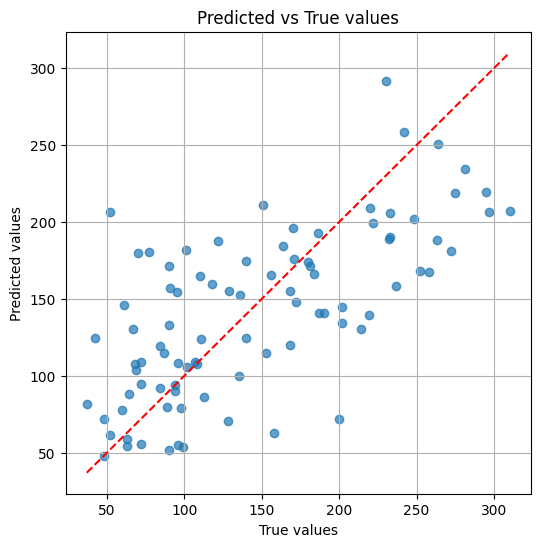

In [22]:
plt.figure(figsize=(6, 6))
plt.scatter(y_test, y_pred, alpha=0.7)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], color='r',linestyle="--")
plt.xlabel("True values")
plt.ylabel("Predicted values")
plt.title("Predicted vs True values")
plt.grid(True)
plt.show()


#### Coefficients of the linear regression model for each feature

<div class="intro">
    
This code creates a horizontal bar chart showing the learned coefficients of the linear regression model for each feature.
It helps visualize which variables have the strongest positive or negative influence on the predicted target, assuming the linear model is appropriate - which, in this case, is likely not fully valid due to weak or nonlinear relationships.
</div>

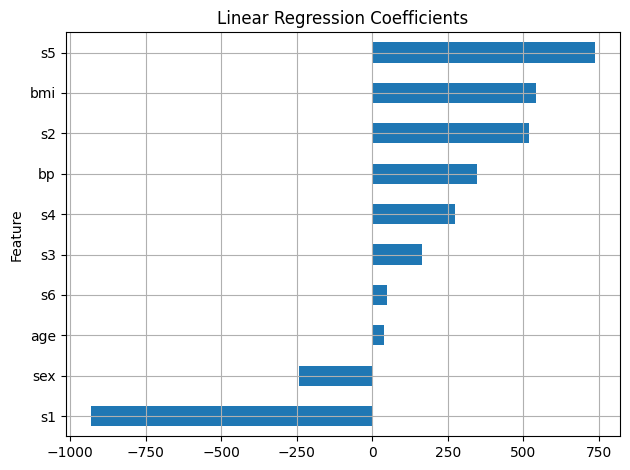

In [18]:
coeff_df = pd.DataFrame({
    'Feature': diabetes.feature_names,
    'Coefficient': model.coef_
}).sort_values(by='Coefficient')

coeff_df.plot(kind='barh', x='Feature', y='Coefficient', legend=False)
plt.title("Linear Regression Coefficients")
plt.grid(True)
plt.tight_layout()
plt.show()


## Logistic regression. Application to the Breast Cancer Dataset

### Introduction
<div class="introT" title="Classification">

Logistic Regression is used for classification problems. It predicts the probability that a given data point belongs to a certain class, like yes/no or 0/1. It uses a logistic function to output a value between 0 and 1. This value is then mapped to a specific class based on a threshold (usually 0.5)

`LogisticRegression` in **scikit-learn** is a **linear classification algorithm** used for **binary or multiclass classification tasks**. Despite its name, it is not used for regression, but rather for **predicting class membership** based on input features.
</div>
<br>
<div class='introT' title="Input features">
    
The model learns a **linear combination of the input features**:

$$z = \beta_0 + \beta_1 x_1 + \beta_2 x_2 + \dots + \beta_n x_n$$

It then transforms this linear score $ z $ into a **probability** using the **logistic (sigmoid) function**:

$$\sigma(z) = \frac{1}{1 + e^{-z}}$$

This output $ \sigma(z) $ is interpreted as the probability that the input belongs to class **1** (versus class **0**).
</div>
<br>
<div class="introT" title="The sigmoid function">
The logistic (or sigmoid) function is the core of logistic regression. It maps any real-valued input to a value between 0 and 1, which can be interpreted as a probability. This S-shaped curve ensures outputs are well-suited for binary classification
</div>

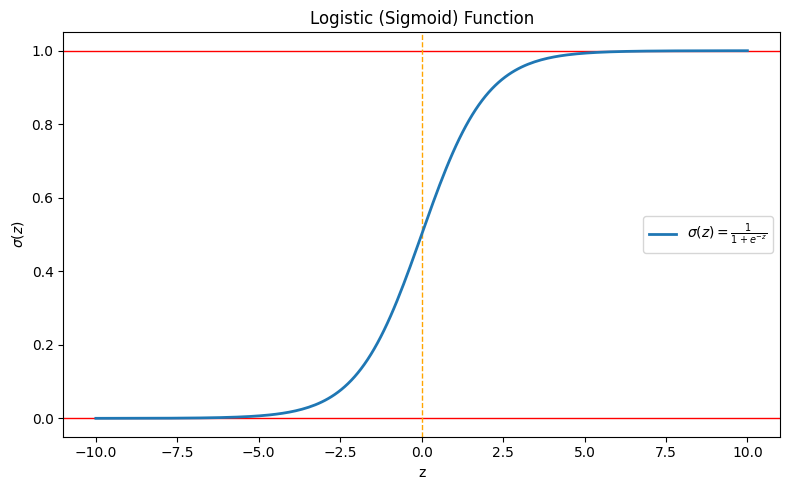

In [8]:
import numpy as np
import matplotlib.pyplot as plt

# Define the logistic (sigmoid) function
def logistic(z):
    return 1 / (1 + np.exp(-z))

# Generate input values from -10 to 10
z = np.linspace(-10, 10, 200)
sigmoid = logistic(z)

# Plotting the logistic function
plt.figure(figsize=(8, 5))
plt.title("Logistic (Sigmoid) Function")
plt.xlabel("z")
plt.ylabel(r'$\sigma(z)$')
plt.axhline(0, color='red', linewidth=1)
plt.axhline(1, color='red', linewidth=1)
plt.axvline(0, color='orange', linestyle='--', linewidth=1)
plt.plot(z, sigmoid, label=r'$\sigma(z) = \frac{1}{1 + e^{-z}}$', linewidth=2)
plt.legend()
plt.tight_layout()
plt.show()


<div class="introT" title="Prediction">

Given the predicted probability $\mathcal{P} = \sigma(z)$, the model predicts the class as:

$$
\hat{y} =
\begin{cases}
1 & \text{if } \sigma(z) > 0.5 \\
0 & \text{otherwise}
\end{cases}
$$
</div>
<br>
<div class="introT" title="Training">

The model is trained by minimizing the **logistic loss function**, also called **log-loss** or **binary cross-entropy**:

$$
\mathcal{L} = - \sum_{i=1}^{N} \left[ y_i \log(\hat{y}_i) + (1 - y_i) \log(1 - \hat{y}_i) \right]
$$

This encourages the predicted probabilities $\hat{y}_i$ to be close to the true labels $y_i \in \{0, 1\}$.

During training, the logistic regression model learns (or "fits") the parameters $\beta_0, \beta_1, \dots, \beta_n$ by minimizing the cross-entropy function on the training data. These parameters are the weights that determine how each input feature contributes to the predicted probability
</div>

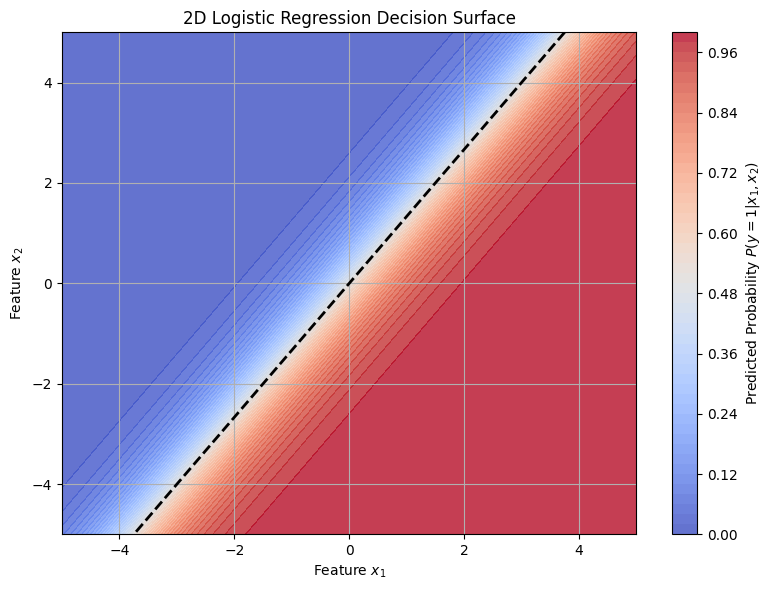

In [20]:
import matplotlib.pyplot as plt
import numpy as np

# Create a 2D grid of input features (x1, x2)
x1 = np.linspace(-5, 5, 200)
x2 = np.linspace(-5, 5, 200)
X1, X2 = np.meshgrid(x1, x2)

# Define logistic regression parameters
beta0 = 0.0
beta1 = 2.0  # weight for x1
beta2 = -1.5  # weight for x2

# Compute the linear combination z = beta0 + beta1*x1 + beta2*x2
Z = beta0 + beta1 * X1 + beta2 * X2

# Apply the sigmoid function to get predicted probabilities
P = 1 / (1 + np.exp(-Z))

# Plot the decision surface
plt.figure(figsize=(8, 6))
contour = plt.contourf(X1, X2, P, levels=50, cmap='coolwarm', alpha=0.8)
plt.colorbar(contour, label='Predicted Probability $P(y=1|x_1, x_2)$')

# Overlay the decision boundary where P = 0.5
plt.contour(X1, X2, P, levels=[0.5], colors='black', linestyles='--', linewidths=2)

plt.title("2D Logistic Regression Decision Surface")
plt.xlabel("Feature $x_1$")
plt.ylabel("Feature $x_2$")
plt.grid(True)
plt.tight_layout()
plt.show()


<div class="rqT" title=" The Decision Boundary is Linear">

In logistic regression, we compute a linear combination of input features:

$$
z = \beta_0 + \beta_1 x_1 + \beta_2 x_2
$$

This score is passed through the **sigmoid function** to obtain a probability:

$$
\mathcal{P} = \frac{1}{1 + e^{-z}}
$$

The **decision boundary** is where this probability equals 0.5. That is:

$$
\mathcal{P} = \frac{1}{2} \Rightarrow z = 0
$$

Which leads to:

$$
\beta_0 + \beta_1 x_1 + \beta_2 x_2 = 0
$$

This is the equation of a **line** (or a **hyperplane** in higher dimensions). Therefore, logistic regression produces a **linear decision boundary** in the original feature space.

- Logistic regression can only separate classes that are **linearly separable**, or close to it.
- When the data is **non-linearly separable**, you can:
  - Add **non-linear transformations** (e.g. polynomial features or interactions),
  - Use more powerful models such as **SVMs with kernels**, **decision trees**, or **neural networks**.

</div>

### The dataset

<div class="intro">

Features are computed from a digitized image of a fine needle aspirate (FNA) of a breast mass. They describe characteristics of the cell nuclei present in the image, see description at [https://scikit-learn.org/](https://scikit-learn.org/stable/datasets/toy_dataset.html#breast-cancer-dataset) or on [UC Irvine ML repository](https://archive.ics.uci.edu/dataset/17/breast+cancer+wisconsin+diagnostic)

</div>

In [9]:
from sklearn.datasets import load_breast_cancer
import pandas as pd

# Load the Breast Cancer dataset
breast_cancer = load_breast_cancer()
# Convert the dataset to a DataFrame
breast_cancer_df = pd.DataFrame(data=breast_cancer.data,
                           columns=breast_cancer.feature_names)

# Add target variable to the DataFrame
breast_cancer_df['target'] = breast_cancer.target
display(breast_cancer_df)


,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,target
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.30010,0.14710,0.2419,0.07871,...,17.33,184.60,2019.0,0.16220,0.66560,0.7119,0.2654,0.4601,0.11890,0
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.08690,0.07017,0.1812,0.05667,...,23.41,158.80,1956.0,0.12380,0.18660,0.2416,0.1860,0.2750,0.08902,0
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.19740,0.12790,0.2069,0.05999,...,25.53,152.50,1709.0,0.14440,0.42450,0.4504,0.2430,0.3613,0.08758,0
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.24140,0.10520,0.2597,0.09744,...,26.50,98.87,567.7,0.20980,0.86630,0.6869,0.2575,0.6638,0.17300,0
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.19800,0.10430,0.1809,0.05883,...,16.67,152.20,1575.0,0.13740,0.20500,0.4000,0.1625,0.2364,0.07678,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
564,21.56,22.39,142.00,1479.0,0.11100,0.11590,0.24390,0.13890,0.1726,0.05623,...,26.40,166.10,2027.0,0.14100,0.21130,0.4107,0.2216,0.2060,0.07115,0
565,20.13,28.25,131.20,1261.0,0.09780,0.10340,0.14400,0.09791,0.1752,0.05533,...,38.25,155.00,1731.0,0.11660,0.19220,0.3215,0.1628,0.2572,0.06637,0
566,16.60,28.08,108.30,858.1,0.08455,0.10230,0.09251,0.05302,0.1590,0.05648,...,34.12,126.70,1124.0,0.11390,0.30940,0.3403,0.1418,0.2218,0.07820,0
567,20.60,29.33,140.10,1265.0,0.11780,0.27700,0.35140,0.15200,0.2397,0.07016,...,39.42,184.60,1821.0,0.16500,0.86810,0.9387,0.2650,0.4087,0.12400,0


### Training a model

In [14]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

X, y = breast_cancer.data, breast_cancer.target

# Splitting the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Creating and training the Logistic Regression model
model = LogisticRegression(max_iter=10000)
model.fit(X_train, y_train)

# Predicting the test set results
y_pred = model.predict(X_test)

# Evaluating the model
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

# Print the results
print(f"Accuracy: {accuracy:.2f}")
print(f"Precision: {precision:.2f}")
print(f"Recall: {recall:.2f}")
print(f"F1 score: {f1:.2f}")

Accuracy: 0.96
Precision: 0.95
Recall: 0.99
F1 score: 0.97


<div class="rqE">

About the metrics:
- the recall is the ratio tp / (tp + fn) where tp is the number of true positives and fn the number of false negatives
- the F1 score is the harmonic mean of the precision and recall. It thus symmetrically represents both precision and recall in one metric

The high recall indicates that **the model is particularly good at identifying malignant cases**, which is crucial in medical diagnostics.
</div>

### Graphical output

#### Performance of the model: confusion matrix

<div class="intro">

The confusion matrix displays how many samples were correctly or incorrectly classified. It separates true positives, true negatives, false positives, and false negatives. It complements precision and recall by showing how the model performs in detail.
</div>

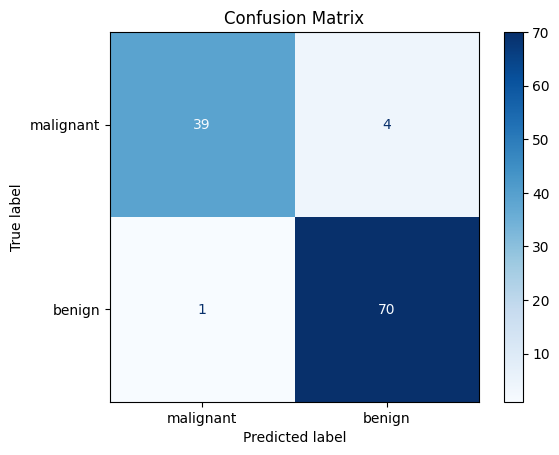

In [16]:
from sklearn.metrics import ConfusionMatrixDisplay, confusion_matrix

cm = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm,
                              display_labels=breast_cancer.target_names)
disp.plot(cmap="Blues")
plt.title("Confusion Matrix")
plt.grid(False)
plt.show()


#### Weights of the descriptors on the breast cancer probability

<div class="intro">

This heatmap shows the weights (coefficients) learned by the logistic regression model. Positive coefficients increase the probability that the tumor is malignant, while negative ones are associated with benign tumors. The intensity reflects the relative importance of each feature in the decision.
</div>

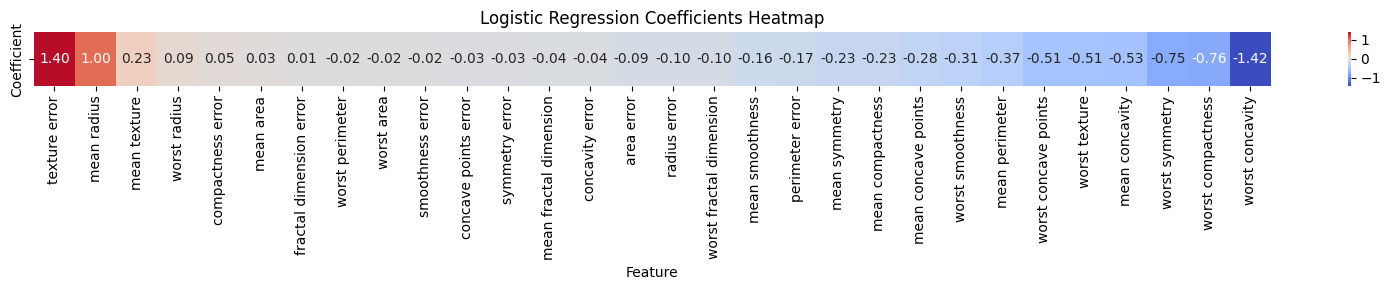

In [19]:
import seaborn as sns
import matplotlib.pyplot as plt

# Récupérer les coefficients et les associer aux noms des features
coef_df = pd.DataFrame({
    'Feature': breast_cancer.feature_names,
    'Coefficient': model.coef_[0]
}).sort_values(by='Coefficient', ascending=False)

# Heatmap simple
plt.figure(figsize=(16, 3))
sns.heatmap(coef_df.set_index('Feature').T, cmap='coolwarm', center=0, annot=True, fmt=".2f")
plt.title("Logistic Regression Coefficients Heatmap")
plt.tight_layout()
plt.show()


<div class="rqT" title="Clinical interpretation">

While the logistic regression model highlights which features contribute most to the prediction of malignancy, a meaningful interpretation of these results should be done in collaboration with a medical expert - such as an oncologist or radiologist - to validate whether the model has correctly identified the clinically relevant diagnostic indicators
</div>

#### Receiver Operating Characteristic (ROC) curve

<div class="intro">

The ROC curve illustrates how well the model separates the two classes at various thresholds. A model with an AUC (Area Under the Curve) close to 1.0 performs very well. It helps assess performance beyond a fixed decision threshold. What is calculated and reported for each sample is:

- **X-axis** = False Positive Rate (FPR):  
  The proportion of actual negatives that are incorrectly classified as positive. It is defined as:

  $$
  \text{FPR} = \frac{\text{False Positives}}{\text{False Positives} + \text{True Negatives}} \in [0, 1]
  $$

- **Y-axis** = True Positive Rate (TPR):  
  The proportion of actual positives that are correctly identified. It is defined as:

  $$
  \text{TPR} = \frac{\text{True Positives}}{\text{True Positives} + \text{False Negatives}} \in [0, 1]
  $$


AUC stands for Area Under the ROC Curve), it quantifies the overall ability of the classifier to rank a random positive example higher than a random negative one.
- AUC = 1.0 → Perfect classifier
- AUC = 0.5 → No better than random guessing
- AUC < 0.5 → Inverted predictions (model is worse than random)
</div>

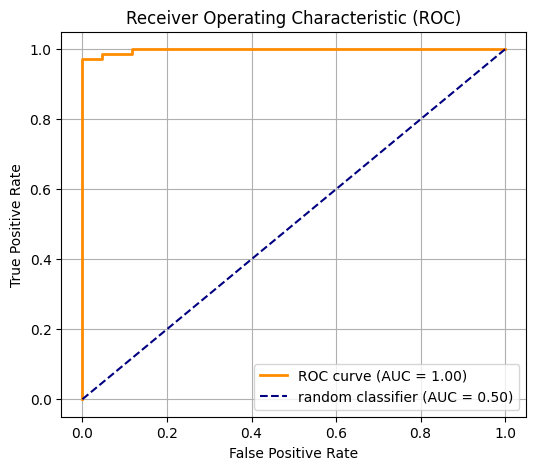

In [24]:
from sklearn.metrics import roc_curve, auc

# Predicted probabilities for the positive class
y_pred = model.predict_proba(X_test)[:, 1]

# Compute ROC curve and AUC
fpr, tpr, thresholds = roc_curve(y_test, y_pred)
roc_auc = auc(fpr, tpr)

# Plot ROC curve
plt.figure(figsize=(6, 5))
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC curve (AUC = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='navy', linestyle='--', label="random classifier (AUC = 0.50)")
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC)')
plt.legend(loc="lower right")
plt.grid(True)
plt.show()


## Decision trees

<div class="introT" title="The model">

This is a supervised learning algorithm that is used for **classifying problems**. It works well in classifying both categorical and continuous dependent variables. This algorithm divides the population into two or more homogeneous sets based on the most significant attributes/ independent variables.

Decision Trees are like flowcharts, splitting the data based on certain conditions or features. They are applied to regression as well as classification.

The way it operates is by using feature values to split the dataset into more manageable subgroups. Every internal node symbolizes an attribute test, every branch denotes the test’s result, and every leaf node represents a class label, *i.e.* the decision

</div>
<br>
<div class="introT" title="The database">

The data is the results of a chemical analysis of wines grown in the same region in Italy by three different cultivators. There are thirteen different measurements taken for different constituents found in the three types of wine, each type being related to a specific grape variety; see description at [https://scikit-learn.org/](https://scikit-learn.org/stable/datasets/toy_dataset.html#breast-cancer-dataset) or on [UC Irvine ML repository](https://archive.ics.uci.edu/dataset/17/breast+cancer+wisconsin+diagnostic)

</div>

In [4]:
from sklearn.datasets import load_wine
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

import pandas as pd

# Load the Wine dataset
wine = load_wine()
X, y = wine.data, wine.target

# Convert the dataset to a DataFrame
wine_df = pd.DataFrame(data=wine.data,
                           columns=wine.feature_names)

# Add target variable to the DataFrame
wine_df['target'] = wine.target
display(wine_df)

# Splitting the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Creating and training the Decision Tree model
model = DecisionTreeClassifier(random_state=42)
model.fit(X_train, y_train)

# Predicting the test set results
y_pred = model.predict(X_test)

# Evaluating the model
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred, average='macro')
recall = recall_score(y_test, y_pred, average='macro')
f1 = f1_score(y_test, y_pred, average='macro')

# Print the results
print(f"Accuracy: {accuracy:.2f}")
print(f"Precision: {precision:.2f}")
print(f"Recall: {recall:.2f}")
print(f"F1 score: {f1:.2f}")

,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline,target
0,14.23,1.71,2.43,15.6,127.0,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065.0,0
1,13.20,1.78,2.14,11.2,100.0,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050.0,0
2,13.16,2.36,2.67,18.6,101.0,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185.0,0
3,14.37,1.95,2.50,16.8,113.0,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480.0,0
4,13.24,2.59,2.87,21.0,118.0,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
173,13.71,5.65,2.45,20.5,95.0,1.68,0.61,0.52,1.06,7.70,0.64,1.74,740.0,2
174,13.40,3.91,2.48,23.0,102.0,1.80,0.75,0.43,1.41,7.30,0.70,1.56,750.0,2
175,13.27,4.28,2.26,20.0,120.0,1.59,0.69,0.43,1.35,10.20,0.59,1.56,835.0,2
176,13.17,2.59,2.37,20.0,120.0,1.65,0.68,0.53,1.46,9.30,0.60,1.62,840.0,2


Accuracy: 0.94
Precision: 0.95
Recall: 0.93
F1 score: 0.94


<div class="rqE">

These results indicate that **the Decision Tree model performs very well on this dataset**, given its ability to accurately predict a particular class of wine.
</div>

## Naive bayes

### Introduction

<div class="introT" title="The model">

A Naive Bayes classifier is based on Bayes' Theorem and the assumption of feature independence, in other words it assumes that the presence of a particular feature in a class is unrelated to the presence of any other feature.
Even if these features are related to each other, a Naive Bayes classifier would consider all of these properties independently when calculating the probability of a particular outcome.

A Naive Bayesian model is easy to build and useful for massive datasets. It's simple and is known to outperform even highly sophisticated classification methods.

These classifiers are a family of simple “probabilistic classifiers” that use the Bayes theorem and strong (naive) independence assumptions between the features. It’s particularly used in text classification problems such as spam detection, sentiment analysis, and document categorization
</div>
<br>
<div class="introT" title="The Bayes theorem">

Here's a more detailed explanation:

#### Key Concepts:

1. **Bayes' Theorem:**

Bayes' Theorem describes the probability of an event A, based on prior knowledge of conditions, B, that might be related to the event. It is expressed as:
$$\mathcal{P}(\mathrm{A|B})=\frac{\mathcal{P}(\mathrm{B|A})\cdot\mathcal{P}(\mathrm{A})}{\mathcal{P}(\mathrm{B})}$$

where:
- $\mathcal{P}(\mathrm{A|B})$ is the posterior probability of class A given predictor B
- $\mathcal{P}(\mathrm{B|A})$ is the likelihood of predictor B given class A
- $\mathcal{P}(\mathrm{A})$ is the prior probability of class A
- $\mathcal{P}(\mathrm{B})$ is the prior probability of predictor B

2. **Naive Assumption of Independence:**
   The "naive" part of Naive Bayes assumes that the features are independent of each other given the class. This simplification makes the calculation of the joint probability of the features easier and computationally efficient.

#### Types of Naive Bayes Classifiers:

1. **Gaussian Naive Bayes:**
   Assumes that the features follow a normal distribution. This is useful for continuous data.

2. **Multinomial Naive Bayes:**
   Used for discrete data and often applied in text classification with word counts or frequencies.

3. **Bernoulli Naive Bayes:**
   Also used for discrete data, but specifically for binary/boolean features (e.g., presence or absence of a word in text classification).

#### How Naive Bayes Works:

1. **Training Phase:**
   - Calculate the prior probability for each class.
   - Calculate the likelihood of each feature given each class.
   - Store these probabilities for use during the prediction phase.

2. **Prediction Phase:**
   - For a new instance, calculate the posterior probability for each class using Bayes' Theorem.
   - Choose the class with the highest posterior probability as the predicted class.

#### Example:

Let's say we have a simple dataset of emails labeled as "spam" or "not spam" with features representing the presence of specific words, namely Free, Win , Click.

##### Training Data

| Email   | Free | Win | Click | Label     |
|---------|--------|-------|---------|-----------|
| Email 1 | Yes    | Yes   | Yes     | Spam      |
| Email 2 | No     | Yes   | No      | Not Spam  |
| Email 3 | Yes    | No    | Yes     | Spam      |
| Email 4 | No     | No    | No      | Not Spam  |

##### Steps

1. **Calculate Prior Probabilities:**
   
- $\mathcal{P}(\text{Spam}) = \frac{2}{4} = 0.5$
- $\mathcal{P}(\text{Not Spam}) = \frac{2}{4} = 0.5$

2. **Calculate Likelihoods:**
- $\mathcal{P}(\text{Free}|\text{Spam}) = \frac{2}{2} = 1$
- $\mathcal{P}(\text{Win}|\text{Spam}) = \frac{1}{2} = 0.5$
- $\mathcal{P}(\text{Click}|\text{Spam}) = \frac{2}{2} = 1$
- $\mathcal{P}(\text{Free}|\text{Not Spam}) = \frac{0}{2} = 0$
- $\mathcal{P}(\text{Win}|\text{Not Spam}) = \frac{1}{2} = 0.5$
- $\mathcal{P}(\text{Click}|\text{Not Spam}) = \frac{0}{2} = 0$

3. **Predict a New Email:**

For a new email with features "Free: Yes", "Win: Yes", "Click: Yes":

$$\mathcal{P}(\text{Spam|Email}) = \frac{\mathcal{P}(\text{Email|Spam}) \cdot \mathcal{P}(\text{Spam})}{\mathcal{P}(\text{Email})} \approx \mathcal{P}(\text{Free|Spam}) \cdot \mathcal{P}(\text{Win|Spam}) \cdot \mathcal{P}(\text{Click|Spam}) \cdot \mathcal{P}(\text{Spam}) \approx 1 \cdot 0.5 \cdot 1 \cdot 0.5 = 0.25$$

Similarly, calculate for Not Spam:

$$\mathcal{P}(\text{Not Spam|Email}) \approx \mathcal{P}(\text{Free|Not Spam}) \cdot \mathcal{P}(\text{Win|Not Spam}) \cdot \mathcal{P}(\text{Click|Not Spam}) \cdot \mathcal{P}(\text{Not Spam}) \approx 0 \cdot 0.5 \cdot 0 \cdot 0.5 = 0$$

Since $\mathcal{P}(\text{Spam|Email}) > \mathcal{P}(\text{Not Spam|Email})$, we classify the new email as Spam.

#### Cons and pros

##### Advantages:

- Simple to understand and implement.
- Requires less training data.
- Handles both continuous and discrete data.
- Highly scalable with the number of predictors/features.

##### Disadvantages:

- The assumption of independent predictors is rarely true in real-world applications.
- Can perform poorly if the feature independence assumption is violated.

</div>
<br>
<div class="introT" title="The database">


</div>

In [5]:
from sklearn.datasets import load_digits
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

import pandas as pd

# Load the Digits dataset
digits = load_digits()
X, y = digits.data, digits.target

# Splitting the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Creating and training the Naive Bayes model
model = GaussianNB()
model.fit(X_train, y_train)

# Predicting the test set results
y_pred = model.predict(X_test)

# Evaluating the model
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred, average='macro')
recall = recall_score(y_test, y_pred, average='macro')
f1 = f1_score(y_test, y_pred, average='macro')

# Print the results
print(f"Accuracy: {accuracy:.2f}")
print(f"Precision: {precision:.2f}")
print(f"Recall: {recall:.2f}")
print(f"F1 score: {f1:.2f}")

Accuracy: 0.85
Precision: 0.86
Recall: 0.85
F1 score: 0.84


<div class="rqE">

The Naive Bayes model has a **good performance** on this dataset, with fairly balanced precision and recall. It is quite effective in classifying handwritten digits, though there’s **room for improvement**, especially in terms of accuracy and F1 score.
</div>

# Bibliography and useful links

[Top 10 Machine Learning Algorithms For Beginners: Supervised, and More, by Simon Tavasoli](https://www.simplilearn.com/10-algorithms-machine-learning-engineers-need-to-know-article)

[Top 10 Machine Learning Algorithms for Beginner Data Scientists](https://medium.com/@nathanrosidi/top-10-machine-learning-algorithms-for-beginner-data-scientists-aae78826712f)

[Wikipedia page on the perceptron model](https://en.wikipedia.org/wiki/Perceptron)

[Hands-on machine learning with scikit-learn, keras and tensorflow (3rd edition, **2022**), Aurélien Géron, O'Reilly editions](https://github.com/ageron/handson-ml3)

[TensorFlow 2 Tutorial: Get Started in Deep Learning with tf.keras](https://machinelearningmastery.com/tensorflow-tutorial-deep-learning-with-tf-keras/)

Some images were generated with [DALL·E](https://openai.com/dall-e-2)

In [22]:
vID.end(cwd0)

**End at:** Wednesday 27 March 2024, 12:26:09  
**Duration:** 00:06:30 896ms

<p style="text-align: center"><img width="800px" src="./config/svg/logoEnd.svg" style="margin-left:auto; margin-right:auto"/></p>